In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.optimize import minimize

In [46]:
t_max = pd.read_csv('../data/t_max.csv')
t_min = pd.read_csv('../data/t_min.csv')
t_avg = pd.read_csv('../data/t_avg.csv')

t_max.set_index('Date', inplace=True)
t_min.set_index('Date', inplace=True)
t_avg.set_index('Date', inplace=True)

In [47]:
def calculate_linear_trend(data):
    x = np.arange(len(data))
    y = data
    m, c = np.polyfit(x, y, 1)
    
    return m, c, len(data)

In [48]:
def calculate_quadratic_trend(data):
    x = np.arange(len(data))
    y = data
    a, b, c = np.polyfit(x, y, 2)
    
    residuals = y - (a * x**2 + b * x + c)
    
    return a, b, c, residuals, len(data)

In [49]:
print('Max Temperature')
for city in t_max.columns:
    data = t_max[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_max)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')
    
    t_max[f'{city}_detrended'] = r

Max Temperature
Amsterdam: 0.30450°C/decade
Amsterdam: -1.430337621786764e-07x^2 + 0.0005439573975655092x + -0.3446876709240129
Atlanta: 0.47282°C/decade
Atlanta: -4.843317734731766e-07x^2 + 0.0018419137345184872x + -1.16715933643987
Boston: 0.96779°C/decade
Boston: -7.193510154636483e-07x^2 + 0.002735691911808252x + -1.7335167747824933
Burbank: -4.40826°C/decade
Burbank: -4.6701169420833453e-07x^2 + 0.0017760454730742846x + -1.1254208147713463
Chicago: 2.15618°C/decade
Chicago: -5.380191852547868e-07x^2 + 0.0020460869615239546x + -1.2965371046190028
Cincinnati: 0.89677°C/decade
Cincinnati: -5.602861733579909e-07x^2 + 0.0021307683172804353x + -1.3501968570500187
Dallas: 0.71383°C/decade
Dallas: -2.4292672735669294e-07x^2 + 0.0009238503441374938x + -0.5854131680684433
Essen: 0.57222°C/decade
Essen: -1.960948615044772e-07x^2 + 0.0007457487583015277x + -0.4725561298437342
Houston: 1.25035°C/decade
Houston: -4.278731562003778e-07x^2 + 0.0016272016130300336x + -1.031103422123355
Las Vegas: 

In [50]:
print('Min Temperature')
for city in t_min.columns:
    data = t_min[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_min)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')
    
    t_min[f'{city}_detrended'] = r
    



Min Temperature
Amsterdam: 0.59941°C/decade
Amsterdam: 6.783781631933471e-08x^2 + -0.0002579872154624281x + 0.163477898864693
Atlanta: 0.77790°C/decade
Atlanta: -6.648172452197239e-07x^2 + 0.0025282999835706107x + -1.6020994229225787
Boston: 1.56595°C/decade
Boston: -6.632606219387446e-07x^2 + 0.0025223801452330407x + -1.5983482186960014
Burbank: -2.60316°C/decade
Burbank: -1.872745276591863e-07x^2 + 0.0007122050286878815x + -0.45130058651186966
Chicago: 2.79617°C/decade
Chicago: -7.117299065469599e-07x^2 + 0.0027067088345980833x + -1.715151164856982
Cincinnati: 1.11126°C/decade
Cincinnati: -7.239837180736715e-07x^2 + 0.0027533100798341694x + -1.7446808205882463
Dallas: 0.32994°C/decade
Dallas: -3.165301633035085e-07x^2 + 0.0012037642110432414x + -0.7627852550643969
Essen: 0.42451°C/decade
Essen: 9.101351435557596e-09x^2 + -3.461243950942552e-05x + 0.02193274916914312
Houston: 0.71010°C/decade
Houston: -4.800073349458923e-07x^2 + 0.0018254678947992268x + -1.1567381560044354
Las Vegas: 

In [51]:
print('Average Temperature')
for city in t_avg.columns:
    data = t_avg[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_avg)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')

    t_avg[f'{city}_detrended'] = r

Average Temperature
Amsterdam: 0.45195°C/decade
Amsterdam: -3.7597972929670945e-08x^2 + 0.00014298509105153322x + -0.09060488602964344
Atlanta: 0.62536°C/decade
Atlanta: -5.745745093464493e-07x^2 + 0.0021851068590445434x + -1.3846293796812181
Boston: 1.26687°C/decade
Boston: -6.913058187011959e-07x^2 + 0.002629036028520646x + -1.6659324967392428
Burbank: -3.50571°C/decade
Burbank: -3.2714311093376045e-07x^2 + 0.0012441252508811145x + -0.7883607006416654
Chicago: 2.47618°C/decade
Chicago: -6.248745459008741e-07x^2 + 0.0023763978980610207x + -1.5058441347379983
Cincinnati: 1.00401°C/decade
Cincinnati: -6.421349457158323e-07x^2 + 0.002442039198557306x + -1.547438838819137
Dallas: 0.52188°C/decade
Dallas: -2.7972844533010033e-07x^2 + 0.00106380727759037x + -0.6740992115664217
Essen: 0.49837°C/decade
Essen: -9.34967550344597e-08x^2 + 0.00035556815939604645x + -0.22531169033728402
Houston: 0.98022°C/decade
Houston: -4.539402455731345e-07x^2 + 0.0017263347539146264x + -1.093920789063886
Las V

In [52]:
display(t_max)
display(t_min)
display(t_avg)

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,...,Essen_detrended,Houston_detrended,Las Vegas_detrended,London_detrended,Minneapolis_detrended,New York_detrended,Paris_detrended,Philadelphia_detrended,Portland_detrended,Sacramento_detrended
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.0,8.333333,-1.666667,77.0,-5.555556,8.333333,20.555556,8.9,18.333333,18.888889,...,-5.329421,-7.112290,-8.404302,-4.320433,-28.659768,-15.006369,-5.279724,-12.068679,-11.417885,-7.696799
2014-01-02,9.9,11.111111,-3.333333,84.0,-6.111111,3.888889,6.111111,9.4,15.000000,17.777778,...,-4.830316,-10.447579,-9.516714,-4.621201,-26.995092,-15.564855,-4.481045,-15.404261,-9.751508,-4.919478
2014-01-03,11.4,2.222222,-10.000000,76.0,-6.666667,-7.777778,11.111111,12.2,12.222222,16.111111,...,-2.031212,-13.227311,-11.184680,-5.021968,-13.108193,-22.790006,-2.382366,-22.628731,-9.196242,-5.475490
2014-01-04,9.3,2.222222,-2.777778,72.0,-0.555556,3.333333,21.111111,10.1,18.888889,17.222222,...,-4.132107,-6.562598,-10.074868,-6.222735,-9.776849,-17.792934,-3.183686,-18.742088,-12.529864,-4.364835
2014-01-05,8.5,11.111111,3.333333,78.0,-1.666667,8.888889,10.000000,8.4,18.333333,13.888889,...,-5.833002,-7.120107,-13.409499,-3.223502,-30.334392,-5.573638,-4.485005,-5.411000,-8.641264,-5.476402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,18.3,30.555556,23.333333,74.0,23.333333,25.555556,35.555556,19.1,35.555556,36.666667,...,4.296129,8.854728,11.452824,2.616031,6.453337,8.590857,0.600497,7.026981,6.374197,6.353527
2024-05-28,19.1,30.000000,28.888889,75.0,22.222222,25.000000,27.777778,18.3,32.222222,38.333333,...,3.496723,5.522691,13.121888,2.416608,7.010066,11.371121,0.301335,10.917643,-0.847435,5.799099
2024-05-29,17.8,30.000000,25.000000,74.0,21.111111,21.111111,31.111111,18.2,31.666667,37.222222,...,3.397318,4.968431,12.013174,5.117185,9.233463,8.595831,-0.497828,7.586084,1.930933,8.022449


,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,...,Essen_detrended,Houston_detrended,Las Vegas_detrended,London_detrended,Minneapolis_detrended,New York_detrended,Paris_detrended,Philadelphia_detrended,Portland_detrended,Sacramento_detrended
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,4.1,1.666667,-7.222222,44.0,-12.222222,-5.000000,-0.555556,4.0,7.777778,4.444444,...,-3.512362,-6.880496,-11.203633,-2.459215,-24.129951,-11.578329,-1.570397,-12.418312,-7.276491,-11.017088
2014-01-02,5.6,-3.333333,-16.666667,50.0,-18.333333,-11.666667,-3.888889,6.3,2.777778,5.555556,...,-1.212439,-11.882508,-10.093637,-1.959337,-25.243426,-15.470382,0.228959,-12.976539,-7.276637,-9.349964
2014-01-03,5.6,-6.111111,-16.666667,49.0,-24.444444,-16.111111,-3.888889,5.0,-0.555556,5.000000,...,-2.512516,-15.217852,-10.650308,-1.559458,-25.245789,-19.917990,0.828315,-19.090320,-9.499005,-9.349508
2014-01-04,5.6,-4.444444,-16.666667,48.0,-7.222222,-11.111111,5.000000,5.9,1.666667,4.444444,...,-1.612593,-12.997640,-11.206978,-2.759580,-20.803706,-20.476706,-0.672328,-20.759655,-11.721374,-9.349051
2014-01-05,1.8,1.111111,-4.444444,46.0,-19.444444,-4.444444,-6.111111,4.4,1.666667,1.666667,...,-3.112670,-12.999648,-13.985869,-7.359701,-30.806067,-11.590977,-4.272972,-15.206766,-12.277075,-11.015261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,12.2,18.333333,15.000000,54.0,14.444444,16.111111,23.333333,10.8,25.000000,22.222222,...,2.863824,9.625268,8.271251,2.791910,7.998776,9.901878,3.245568,12.314289,2.409275,3.564800
2024-05-28,10.5,20.555556,18.888889,55.0,12.222222,15.000000,17.777778,10.0,20.000000,23.888889,...,2.063677,4.626904,9.939928,1.791954,8.000507,9.348805,-0.554412,10.649861,4.631770,2.453889
2024-05-29,13.0,17.777778,15.555556,56.0,9.444444,11.666667,21.111111,11.8,21.111111,24.444444,...,3.863531,5.739651,10.497494,4.391997,6.891128,7.129067,4.545609,8.429879,2.409821,3.009646


,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,...,Essen_detrended,Houston_detrended,Las Vegas_detrended,London_detrended,Minneapolis_detrended,New York_detrended,Paris_detrended,Philadelphia_detrended,Portland_detrended,Sacramento_detrended
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6.55,5.000000,-4.444444,60.5,-8.888889,1.666667,10.000000,6.45,13.055556,11.666667,...,-4.420891,-6.996393,-9.803967,-3.389824,-26.394860,-13.292349,-3.425061,-12.243496,-9.347188,-9.356943
2014-01-02,7.75,3.888889,-10.000000,67.0,-12.222222,-3.888889,1.111111,7.85,8.888889,11.666667,...,-3.021378,-11.165043,-9.805176,-3.290269,-26.119259,-15.517619,-2.126043,-14.190400,-8.514072,-7.134721
2014-01-03,8.50,-1.944444,-13.333333,62.5,-15.555556,-11.944444,3.611111,8.60,5.833333,10.555556,...,-2.271864,-14.222582,-10.917494,-3.290713,-19.176991,-21.353998,-0.777025,-20.859525,-9.347624,-7.412499
2014-01-04,7.45,-1.111111,-9.722222,60.0,-3.888889,-3.888889,13.055556,8.00,10.277778,10.833333,...,-2.872350,-9.780119,-10.640923,-4.491157,-15.290277,-19.134820,-1.928007,-19.750871,-12.125619,-6.856943
2014-01-05,5.15,6.111111,-0.555556,62.0,-10.555556,2.222222,1.944444,6.40,10.000000,7.777778,...,-4.472836,-10.059878,-13.697684,-5.291601,-30.570230,-8.582308,-4.378988,-10.308883,-10.459170,-8.245832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,15.25,24.444444,19.166667,64.0,18.888889,20.833333,29.444444,14.95,30.277778,29.444444,...,3.579976,9.239998,9.862038,2.703971,7.226057,9.246368,1.923033,9.670635,4.391736,4.959164
2024-05-28,14.80,25.277778,23.888889,65.0,17.222222,20.000000,22.777778,14.15,26.111111,31.111111,...,2.780200,5.074797,11.530908,2.104281,7.505287,10.359963,-0.126538,10.783752,1.892167,4.126494
2024-05-29,15.40,23.888889,20.277778,65.0,15.277778,16.388889,26.111111,15.00,26.388889,30.833333,...,3.630424,5.354041,11.255334,4.754591,8.062296,7.862449,2.023891,8.007982,2.170377,5.516047


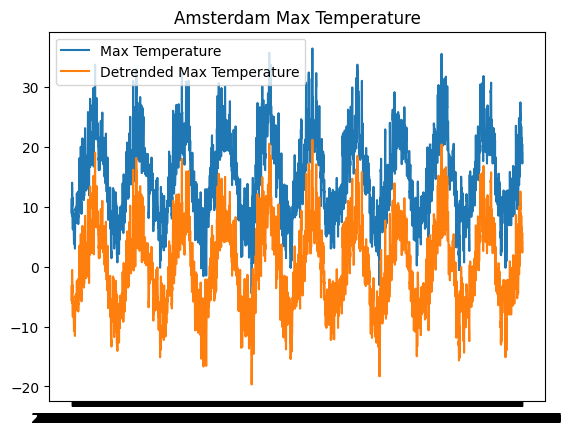

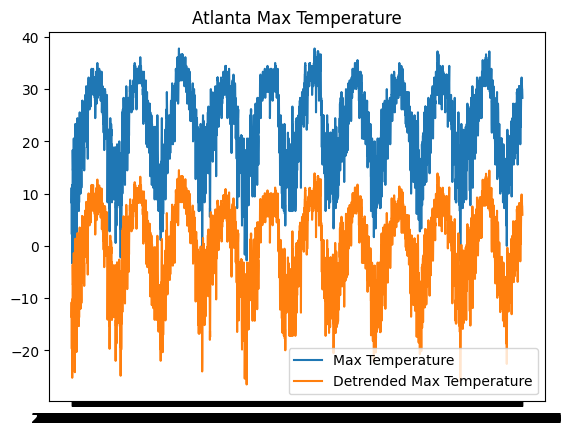

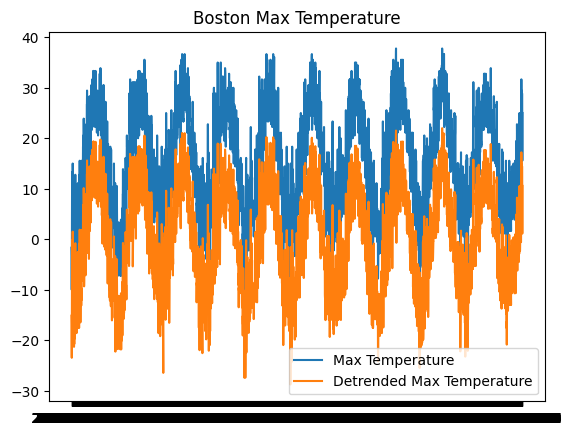

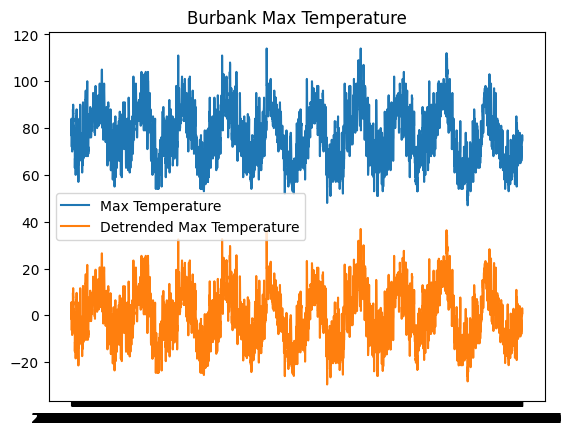

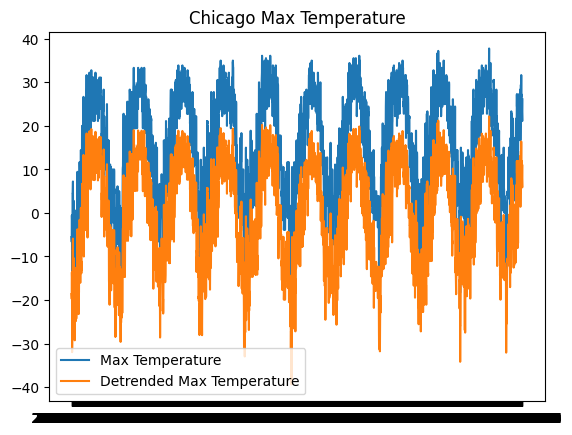

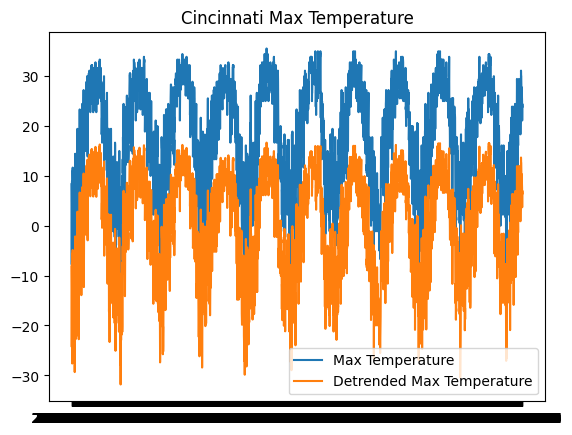

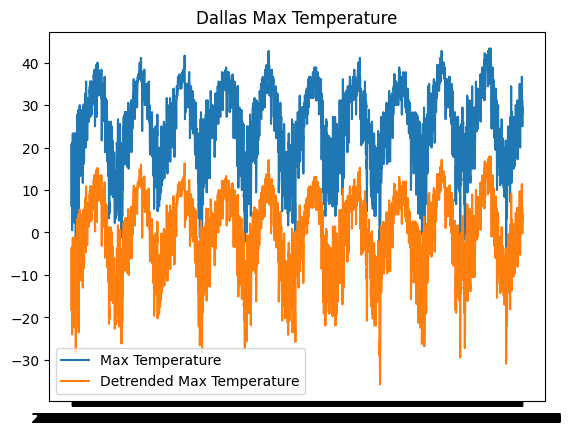

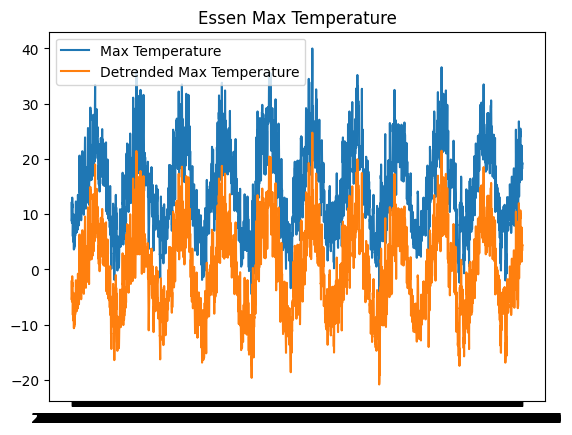

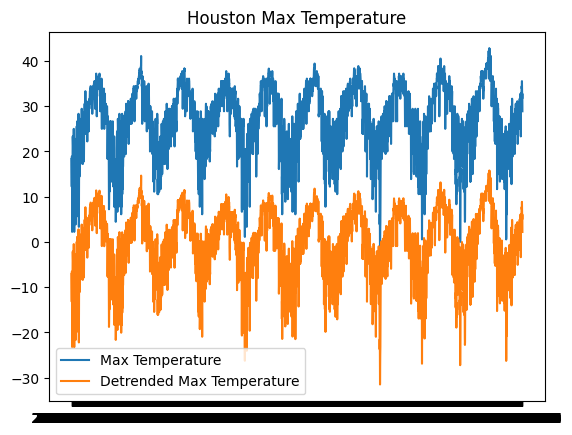

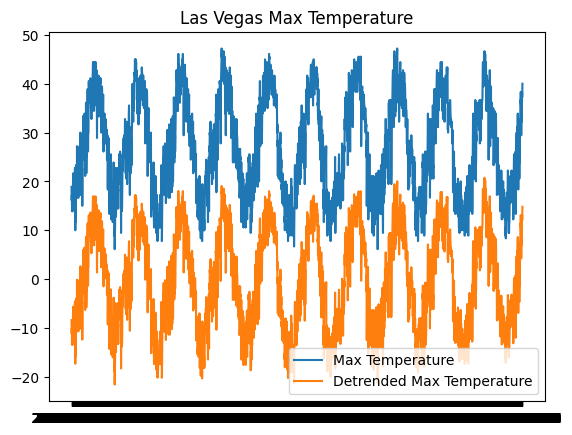

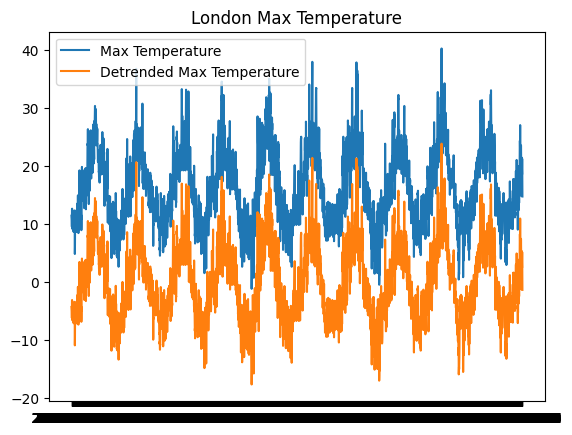

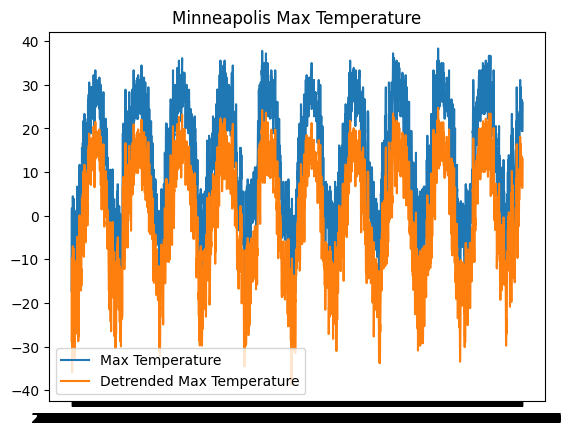

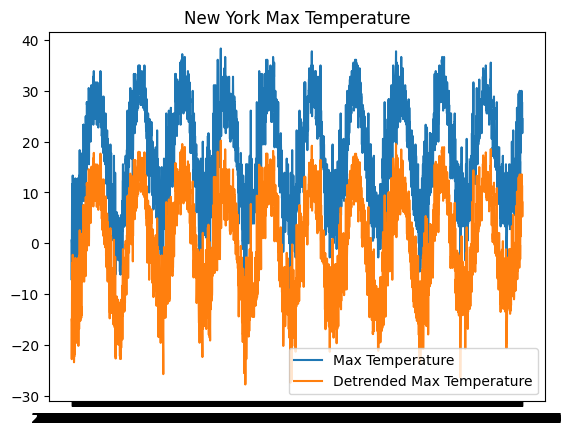

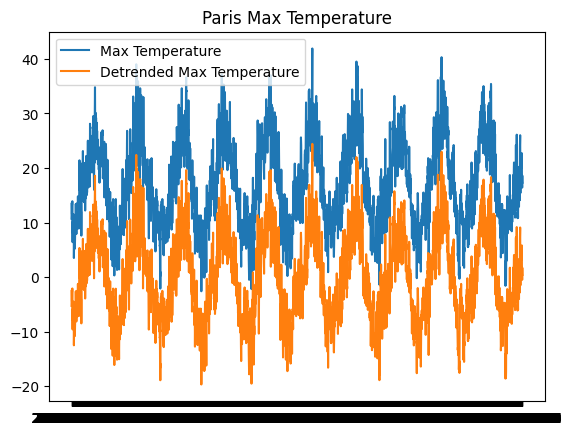

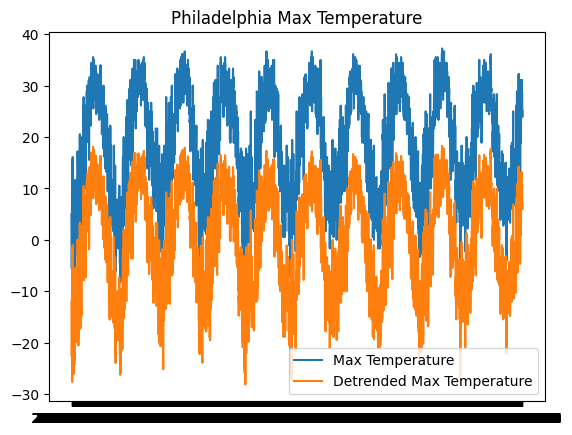

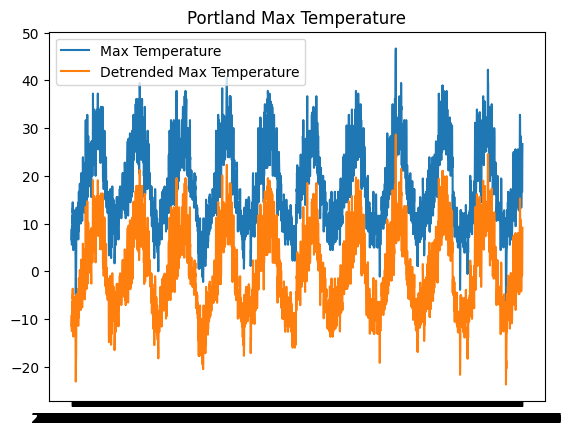

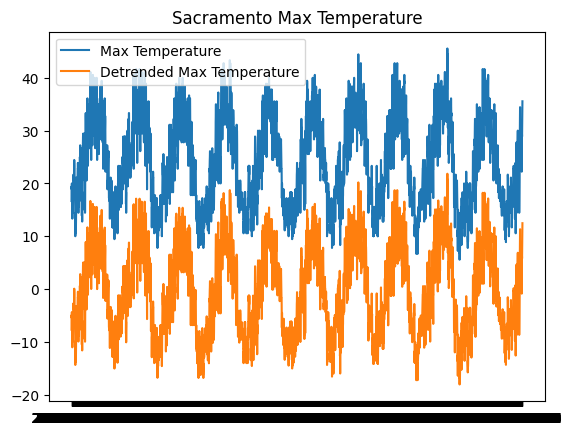

In [ ]:
# for city in t_max.columns:
#     if city.endswith('_detrended'):
#         continue
#     plt.figure()
#     plt.plot(t_max[city], label='Max Temperature')
#     plt.plot(t_max[f'{city}_detrended'], label='Detrended Max Temperature')
#     plt.legend()
#     plt.title(f'{city} Max Temperature')
#     plt.show()

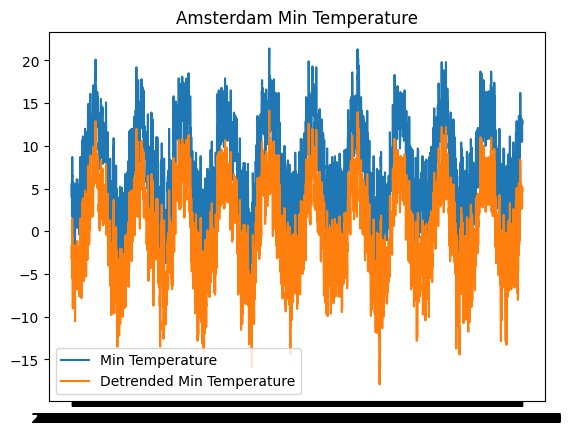

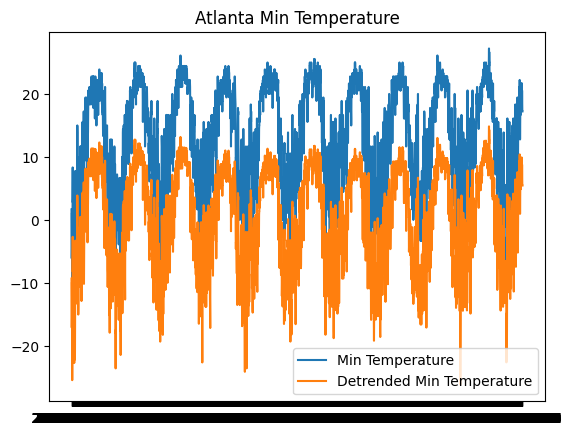

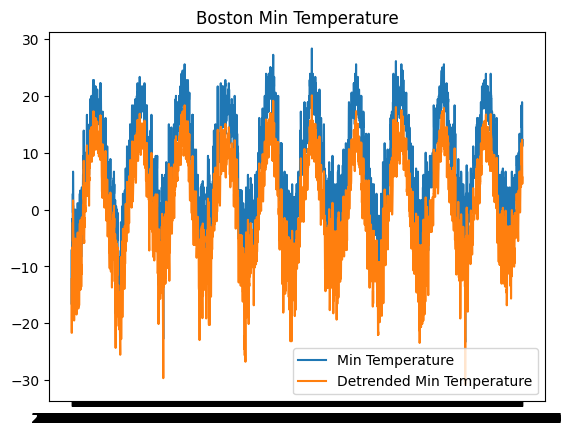

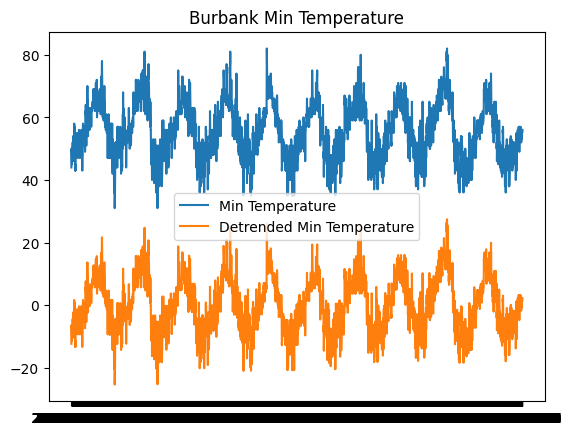

KeyboardInterrupt: 

In [ ]:
# for city in t_min.columns:
#     if city.endswith('_detrended'):
#         continue
#     plt.figure()
#     plt.plot(t_min[city], label='Min Temperature')
#     plt.plot(t_min[f'{city}_detrended'], label='Detrended Min Temperature')
#     plt.legend()
#     plt.title(f'{city} Min Temperature')
#     plt.show()

In [ ]:
# for city in t_avg.columns:
#     if city.endswith('_detrended'):
#         continue
#     plt.figure()
#     plt.plot(t_avg[city], label='Average Temperature')
#     plt.plot(t_avg[f'{city}_detrended'], label='Detrended Average Temperature')
#     plt.legend()
#     plt.title(f'{city} Average Temperature')
#     plt.show()

In [ ]:
def fourier_model(params, t, freq):
    
    A,B = params
    return A*np.cos(2*np.pi*freq*t) + B*np.sin(2*np.pi*freq*t)

In [ ]:
def log_likelihood_fourier(params, data, frequency):
    seasonal_fit = fourier_model(params, np.arange(len(t_max)), frequency)
    residuals = data - seasonal_fit
    sigma = np.std(residuals)
    return 0.5 * np.sum((residuals / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))

In [ ]:
for city in t_max.columns:
    if city.endswith('_detrended'):
        continue
    N = len(t_max)
    t = np.arange(N)
    fft_result = fft(t_max[f'{city}' + '_detrended'].values)
    frequencies = fftfreq(N, d = 1)
    amplitudes = np.abs(fft_result)
    
    num_freqs = 5
    dominant_freqs = frequencies[np.argsort(amplitudes)[-num_freqs:]]
    # Sample frequencies result [3794   10   11 3793   12]
    print(dominant_freqs)
    # frequency = 1/365.25
    # initial_guess = [1, 1]
    # result_fourier = minimize(log_likelihood_fourier, initial_guess, args=(t_max[f'{city}_detrended'].values, frequency), method='L-BFGS-B')
    # A_mle, B_mle = result_fourier.x
    # # Compute seasonal fit
    # seasonal_fit = fourier_model([A_mle, B_mle], t, frequency)

    # # Print results
    # print(f"Estimated A: {A_mle}, Estimated B: {B_mle}")
    
    
    
    

[ 0.00315457 -0.00289169  0.00289169  0.00262881 -0.00262881]
[ 317.         -345.81818182  345.81818182  380.4        -380.4       ]
[-0.00315457 -0.00289169  0.00289169 -0.00262881  0.00262881]
[-317.         -345.81818182  345.81818182 -380.4         380.4       ]
[-0.00236593  0.00289169 -0.00289169 -0.00262881  0.00262881]
[-422.66666667  345.81818182 -345.81818182 -380.4         380.4       ]
[-0.00236593  0.00289169 -0.00289169  0.00262881 -0.00262881]
[-422.66666667  345.81818182 -345.81818182  380.4        -380.4       ]
[-0.00315457  0.00289169 -0.00289169 -0.00262881  0.00262881]
[-317.          345.81818182 -345.81818182 -380.4         380.4       ]
[-0.00315457 -0.00289169  0.00289169 -0.00262881  0.00262881]
[-317.         -345.81818182  345.81818182 -380.4         380.4       ]
[ 0.00315457 -0.00289169  0.00289169 -0.00262881  0.00262881]
[ 317.         -345.81818182  345.81818182 -380.4         380.4       ]
[-0.00315457 -0.00289169  0.00289169  0.00262881 -0.00262881]
